In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the table with grbs varibles in order to atttach $E_{iso}$ and z to each event(these variables will be used for plots

In [2]:
df=pd.read_csv('table_1000_long.csv', index_col=0)

In [3]:
df.head()

,Num,Ra,Dec,Redshift,Eiso,Liso,Epeak,Duration,Gamma0(H),Gamma0(W),Phflux(15-150),alfa,beta,PhFlux(10-1000)
0,1,211.3340,71.0714,2.358773,3.873160e+53,3.471493e+52,602.763363,108.845,153.147,96.239,3.370,-1.130,-2.380,NaN
1,2,82.4082,-23.5267,1.131562,1.684641e+53,1.130565e+52,396.028272,88.762,424.473,165.292,6.918,-1.049,-2.509,NaN
2,3,92.1914,35.9299,2.023389,5.181373e+53,1.973927e+52,560.332365,259.619,362.259,179.344,2.714,-0.955,-2.473,NaN
3,4,11.8900,42.4303,2.852917,7.321880e+52,3.195091e+52,278.800372,22.905,253.767,102.093,3.175,-0.930,-2.438,NaN
4,5,105.1957,-14.9235,2.944518,1.547294e+53,4.593979e+52,568.000476,53.856,220.795,105.403,3.439,-1.002,-2.689,NaN


### Reading significance from npy tables

In [4]:
data= np.load('examples/Events.merged.North.noMoon.thresh10.npy', 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
events = list(data.keys())
sites = list(data[events[0]].keys())


In [5]:
summed={}
max_sigma=[]
z=[]
Eiso=[]

for event in events:
    summed[event]={}
    for i,num in enumerate(df.Num):
        if event.endswith(f'Event{num}'):
            z.append(df.Redshift[num-1] )   #the resulting vectors will 
            Eiso.append(df.Eiso[num-1])     #have the same order as events list
            
            for site in sites:
                summed[event][site]={'significance':[]}

                for night in data[event][site]:
                    if night != 'first_night_start':
                        if type(data[event][site][night]['irf']) == float:
                            
                            summed[event][site]['significance'].append(0.0)
                        else:
                            
                            if type(summed[event][site]['significance'])==float:
                                summed[event][site]['significance']=[]
                            summed[event][site]['significance'].append(
                                data[event][site][night]['significance'])
                


In [6]:
for event in events:
    #print (event)
    for site in sites:                               
            
        summed[event][site]['significance']=np.hstack(summed[event][site]['significance'])
        max_sigma.append(max(summed[event][site]['significance']))
                

In order to inspect if everithing is fine let's print the shape of some vectors. They must be equal if the script has performed correctly. If they are not it's a big deal 

In [7]:
max_sigma=np.array(max_sigma)
print(len(max_sigma))
print (len(events))


700
700


In [8]:
z=np.array(z)   #as usual going from list to array
Eiso=np.array(Eiso)

In [9]:
z.shape     # must be equal to len(events)

(700,)

In [10]:
sel_z=[]
sel_E=[]
sel_sigma=[]
for i in range(len(max_sigma)):
    if max_sigma[i]>=3:
        sel_z.append(z[i])
        sel_E.append(Eiso[i])
        sel_sigma.append(max_sigma[i])
sel_z=np.array(sel_z)
sel_E=np.array(sel_E)

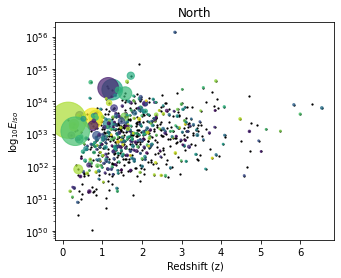

In [11]:
N=len(max_sigma)
M=len(sel_sigma)
c1 = np.random.rand(N)
c2 = np.random.rand(M)
fig, axes = plt.subplots(1,figsize=(5,4));
axes.scatter(z,Eiso,s=1.5,color='black',label='all')
#axes.scatter(z, Eiso, s=max_sigma, c=c1, alpha=0.7, label=r'$\sigma_{max}$')
axes.scatter(sel_z, sel_E, s=sel_sigma, c=c2, alpha=0.7, label=r'$\sigma_{max}$')
axes.set_yscale('log')
#axes.set_xlim(-0.1,5.5)
#axes.set_ylim(0.5e51,5e55)
axes.set_xlabel('Redshift (z)')
axes.set_ylabel(r'$\log_{10}E_{iso}$')
axes.set_title('North')
#axes.legend()
#plt.savefig('examples/Significance-North.png',dpi=72)
plt.show()

Valutare se sia o meno il caso di ridurre il numero di eventi colorati scegliendo di rappresentare in questo modo solo quelli con sigma superiore a 3